# Exercise for k means tutorial
### Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
### Figure out if any preprocessing such as scaling would help here
### Draw elbow plot and from that figure out optimal value of k


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

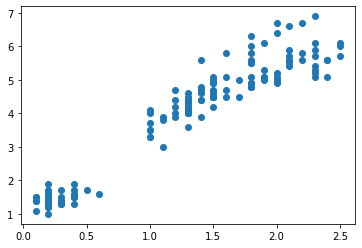

In [7]:
plt.scatter(x = df['petal width (cm)'] , y = df['petal length (cm)'])

In [8]:
from sklearn.cluster import KMeans

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
km = KMeans(n_clusters=3)

In [11]:
km.fit_predict(df[['petal width (cm)','petal length (cm)']])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
y_pred = km.fit_predict(df[['petal width (cm)','petal length (cm)']])

In [13]:
df['Cluster'] = y_pred

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df['Cluster'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
km.cluster_centers_

array([[0.246     , 1.462     ],
       [1.34230769, 4.26923077],
       [2.0375    , 5.59583333]])

In [17]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

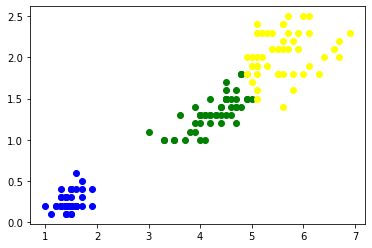

In [18]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    

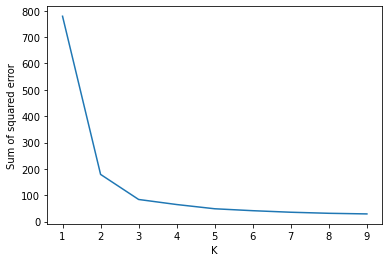

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Diabetic Data K mean clustering

In [21]:
from sklearn.datasets import load_diabetes

In [22]:
diabetic = load_diabetes()

In [23]:
Diabetic_data = pd.DataFrame(diabetic.data,columns=diabetic.feature_names)

In [24]:
Diabetic_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [25]:
d1 = Diabetic_data[['age','bmi']]

In [26]:
d1.head()

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385


In [27]:
kmd = KMeans(n_clusters=3)
y_kmd = kmd.fit_predict(d1)

In [28]:
d1['clusters'] = y_kmd

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
d1.clusters.unique()

array([0, 1, 2], dtype=int64)

In [30]:
d1.head()

,age,bmi,clusters
0,0.038076,0.061696,0
1,-0.001882,-0.051474,1
2,0.085299,0.044451,2
3,-0.089063,-0.011595,1
4,0.005383,-0.036385,2


In [31]:
df1 = d1[d1.clusters==0]
df2 = d1[d1.clusters==1]
df3 = d1[d1.clusters==2]

In [32]:
df1.head()

,age,bmi,clusters
0,0.038076,0.061696,0
8,0.041708,0.061696,0
9,-0.070900,0.039062,0
16,-0.005515,0.042296,0
23,0.045341,0.060618,0


In [33]:
kmd.cluster_centers_

array([[-0.00368192,  0.06460921],
       [-0.0496554 , -0.03772379],
       [ 0.03499099, -0.01101549]])

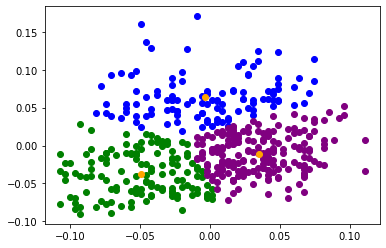

In [34]:
plt.scatter(df1['age'],df1['bmi'],color='blue')
plt.scatter(df2['age'],df2['bmi'],color='green')
plt.scatter(df3['age'],df3['bmi'],color='purple')
plt.scatter(kmd.cluster_centers_[:,0],kmd.cluster_centers_[:,1],color='orange')

In [35]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmd = KMeans(n_clusters=k)
    kmd.fit(d1)
    sse.append(kmd.inertia_)

In [36]:
sse

[294.47963800905006,
 61.809193534902235,
 0.7540319050156491,
 0.6492271725552128,
 0.5259801382641451,
 0.44289322645739293,
 0.3837525185179485,
 0.3292558035908766,
 0.2855140074476068]

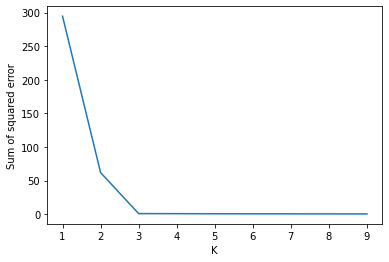

In [37]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Boston K means clustering

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston = load_boston()

In [40]:
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [41]:
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [42]:
boston_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [43]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [44]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [45]:
df = boston_data[['AGE','RM']]

In [46]:
df.head()

,AGE,RM
0,65.2,6.575
1,78.9,6.421
2,61.1,7.185
3,45.8,6.998
4,54.2,7.147


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler =  MinMaxScaler()

In [49]:
df.head()

,AGE,RM
0,65.2,6.575
1,78.9,6.421
2,61.1,7.185
3,45.8,6.998
4,54.2,7.147


In [50]:
scaler.fit(df[['AGE']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
df['AGE'] = scaler.transform(df[['AGE']])

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df.head()

,AGE,RM
0,0.641607,6.575
1,0.782698,6.421
2,0.599382,7.185
3,0.441813,6.998
4,0.528321,7.147


In [53]:
scaler.fit(df[['RM']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
df['RM'] = scaler.transform(df[['RM']])

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df.head()

,AGE,RM
0,0.641607,0.577505
1,0.782698,0.547998
2,0.599382,0.694386
3,0.441813,0.658555
4,0.528321,0.687105


In [56]:
from sklearn.cluster import KMeans
kmb = KMeans(n_clusters=3)

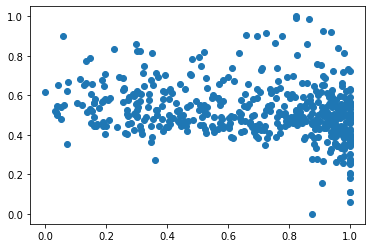

In [57]:
plt.scatter(df['AGE'],df['RM'])

In [58]:
kmb = KMeans(n_clusters=3)
y_kmb = kmb.fit_predict(df)

In [59]:
df['Cluster'] = y_kmb

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df.head()

,AGE,RM,Cluster
0,0.641607,0.577505,2
1,0.782698,0.547998,2
2,0.599382,0.694386,2
3,0.441813,0.658555,1
4,0.528321,0.687105,2


In [61]:
df.Cluster.unique()

array([2, 1, 0], dtype=int64)

In [62]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

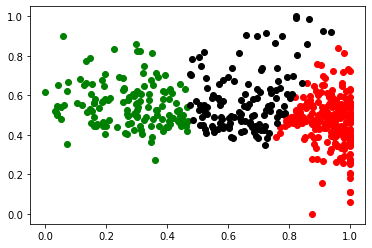

In [63]:
plt.scatter(df1['AGE'],df1['RM'],color = "Red")
plt.scatter(df2['AGE'],df2['RM'],color = "Green")
plt.scatter(df3['AGE'],df3['RM'],color = "black")

In [64]:
kmb.cluster_centers_

array([[0.93028902, 0.4728011 ],
       [0.27553995, 0.55333033],
       [0.65500283, 0.57662447]])

In [65]:
kmb.inertia_

12.474731674168826

In [66]:
sse_b = []
kmb_rng = range(1,10)
for i in kmb_rng:
    kmb = KMeans(n_clusters=i)
    kmb.fit(df)
    sse_b.append(kmb.inertia_)

In [67]:
sse_b

[393.38719530560707,
 89.83851958766544,
 12.474731674168826,
 10.388003090162574,
 8.436230032928963,
 6.8473414247475075,
 6.0789813704812365,
 5.283099311901854,
 4.625569887918088]

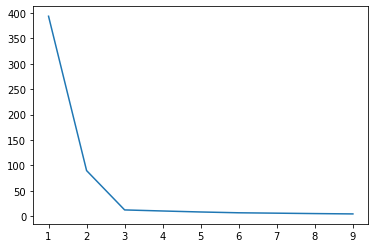

In [68]:
plt.plot(kmb_rng, sse_b)

In [73]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    sse.append(k)

In [74]:
sse

[1, 2, 3, 4, 5, 6, 7, 8, 9]